<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Outlier/impute_mice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: Outliers/df_cut_outlier.csv')
df = df.iloc[:, 1:]
df.head()

,PatientUID,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,...,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,eGFR_t1,time_t1,LabLocation,LabCwhen
0,2299,3386255,-7.158596,90,0,0,0,0,0,0,...,NaN,215.0,81.0,123.0,99.0,NaN,63.60,2017-10-03 09:19:54.710,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-15 09:51:55.203
1,2299,4546471,5.550691,90,90,0,0,0,0,0,...,NaN,219.0,64.0,146.0,73.0,NaN,70.20,2018-12-12 09:18:49.913,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2560-10-03 09:19:54.920
2,2299,5812902,-6.063710,100,100,34,0,0,0,0,...,5.3,193.0,62.0,129.0,65.0,NaN,64.02,2019-12-19 09:51:24.427,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2561-12-12 10:15:36.930
3,2299,6947220,-12.812245,35,0,1,35,0,0,0,...,NaN,205.0,69.0,139.0,76.0,NaN,48.54,2021-03-04 10:01:42.113,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2562-12-19 09:51:24.577
4,2299,8186767,28.287500,100,0,15,0,0,0,0,...,5.5,198.0,74.0,129.0,60.0,NaN,80.47,2022-04-21 08:45:54.580,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2564-03-04 10:07:37.037


In [4]:
data = pd.DataFrame(df)

In [5]:
columns_with_null = data.columns[data.isnull().any()].tolist()
print(columns_with_null)

['BMI', 'BSA', 'Diastolic BP', 'Systolic BP', 'L1:eGFR', 'L2:BUN', 'L3:Creatinine', 'L4:Sodium', 'L5:Potassium', 'L6:Chloride', 'L7:Bicarbonate', 'L8:Uric', 'L9:Calcium', 'L10:Phosphorus', 'L11:Albumin', 'L12:Hemoglobin', 'L13:Hematocrit', 'L14:WBC', 'L15:Platelet', 'L19:Blood sugar', 'L20:HbA1c', 'L21:Cholesterol', 'L22:Triglyceride', 'L23:LDL Cholesterol', 'L24:HDL Cholesterol', 'L28:UrineProtein/Cr ratio']


In [6]:
!pip install statsmodels

In [7]:
import numpy as np
columns_to_mice = [col for col in data.columns
                     if (col not in ['Slopes', 'PatientUID', 'PatientVisitUID',
                                     'InPatient', 'OutPatient', 'Emergency',
                                     'time_t1','eGFR_t1', 'VisitLocation', 'StartDTTM',
                                     'EndDttm', 'LabCwhen'])]

data_selected = data[columns_to_mice].copy()

In [8]:
data_selected

,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,G2M2:Metformin,G2M3:DPP4 inhibitor,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,90,0,0,0,0,0,0,0,0,0,...,NaN,NaN,91.0,NaN,215.0,81.0,123.0,99.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
1,90,90,0,0,0,0,0,0,0,0,...,NaN,NaN,86.0,NaN,219.0,64.0,146.0,73.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
2,100,100,34,0,0,0,0,0,0,0,...,9.41,313.0,100.0,5.3,193.0,62.0,129.0,65.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
3,35,0,1,35,0,0,0,0,0,0,...,NaN,NaN,89.0,NaN,205.0,69.0,139.0,76.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
4,100,0,15,0,0,0,0,0,0,0,...,5.42,NaN,88.0,5.5,198.0,74.0,129.0,60.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,100,100,0,0,0,0,0,0,100,100,...,10.32,306.0,103.0,5.9,165.0,NaN,84.0,43.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
52616,0,100,0,0,0,0,0,0,0,100,...,9.56,361.0,99.0,NaN,154.0,196.0,83.0,42.0,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
52617,0,0,0,0,0,0,0,0,0,0,...,4.61,NaN,NaN,NaN,NaN,96.0,64.0,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย
52618,0,0,0,0,0,0,0,0,0,0,...,9.44,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย


In [10]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   G1M2:ARB                      52620 non-null  int64  
 1   G3M1:Statin                   52620 non-null  int64  
 2   G5M2:NSAIDs                   52620 non-null  int64  
 3   G1M5:Diuretic                 52620 non-null  int64  
 4   G1M7:Beta blocker             52620 non-null  int64  
 5   G1M3:Dihydropyridine CCB      52620 non-null  int64  
 6   G1M6:MRA                      52620 non-null  int64  
 7   G1M1:ACEI                     52620 non-null  int64  
 8   G2M2:Metformin                52620 non-null  int64  
 9   G2M3:DPP4 inhibitor           52620 non-null  int64  
 10  G2M1:SU                       52620 non-null  int64  
 11  G3M3:Fibrate                  52620 non-null  int64  
 12  G2M5:SGLT2i                   52620 non-null  int64  
 13  G

In [11]:
data_selected['Sex'] = data_selected['Sex'].replace({'ชาย': 0, 'หญิง': 1})

In [12]:
nationality_map = {'ไทย': 0}

caucasian = ['บริติช  (อังกฤษ, สก็อตแลนด์)', 'อเมริกัน', 'เยอรมัน', 'โอมาน', 'ออสเตรเลีย', 'แคนาดา',
             'อิตาลี', 'สวิส', 'ซีเรีย', 'เดนมาร์ก', 'นอร์เวย์', 'ดัตช์', 'สเปน', 'เบลเยียม', 'ไอซ์แลนด์',
             'ฝรั่งเศส', 'เซนต์คิตส์และเนวิส', 'สวีเดน', 'ออสเตรีย', 'ไซปรัส']
asian = ['ลาว','จีน','เวียดนาม','เขมรอพยพ','ไทยลื้อ','ญี่ปุ่น', 'จีน(ไต้หวัน)']
other = ['ไม่ระบุ','อื่นๆ','ไร้สัญชาติ']

for nationality in asian:
    nationality_map[nationality] = 1

for nationality in caucasian:
    nationality_map[nationality] = 2

for nationality in other:
    nationality_map[nationality] = 3

data_selected['NATNL'] = data_selected['NATNL'].replace(nationality_map)

In [13]:
data_selected['LabLocation'] = np.where(data_selected['LabLocation'] == "ห้องปฏิบัติการจุลทรรศน์วินิจฉัย", 1, 0)

In [23]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

reference_ranges = {'L2:BUN': (5, 20),
                    'L3:Creatinine': (0.50, 1.5),
                    'L4:Sodium': (130, 147),
                    'L5:Potassium': (3.4, 5),
                    'L6:Chloride': (98, 106),
                    'L7:Bicarbonate': (20.6, 30),
                    'L8:Uric': (2.7, 7.0),
                    'L9:Calcium': (8.4, 10.2),
                    'L10:Phosphorus': (2.5, 4.6),
                    'L11:Albumin': (3.8, 5.4),
                    'L12:Hemoglobin': (12, 14.5),
                    'L13:Hematocrit': (36.0, 50.8),
                    'L14:WBC': (4.0, 10.60),
                    'L15:Platelet': (173, 383),
                    'L19:Blood sugar': (70, 110),
                    'L20:HbA1c': (4.6, 7.0),
                    'L21:Cholesterol': (127, 262),
                    'L22:Triglyceride': (10, 200),
                    'L23:LDL Cholesterol': (10, 150),
                    'L24:HDL Cholesterol': (35, np.inf),
                    'L28:UrineProtein/Cr ratio': (0, 15),
                    'BMI': (18.6, 24),
                    'BSA': (1.5, 2.2),
                    'Diastolic BP': (-np.inf, 80),
                    'Systolic BP': (-np.inf, 120)}

data_mice = data_selected.copy()
imputer = IterativeImputer(random_state=0, initial_strategy='median')
data_mice_filled = imputer.fit_transform(data_mice)

for column, reference_range in reference_ranges.items():
    data_mice_filled[:, data_selected.columns.get_loc(column)] = np.clip(data_mice_filled[:, data_selected.columns.get_loc(column)], *reference_range)

data_mice_filled = pd.DataFrame(data_mice_filled, columns=data_selected.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [24]:
data_mice_filled

,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,G1M5:Diuretic,G1M7:Beta blocker,G1M3:Dihydropyridine CCB,G1M6:MRA,G1M1:ACEI,G2M2:Metformin,G2M3:DPP4 inhibitor,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.699413,225.645490,91.000000,5.610058,215.000000,81.000000,123.000000,99.000000,8.153554,1.0
1,90.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.467940,245.031431,86.000000,5.267543,219.000000,64.000000,146.000000,73.000000,7.766715,1.0
2,100.0,100.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.410000,313.000000,100.000000,5.300000,193.000000,62.000000,129.000000,65.000000,9.425626,1.0
3,35.0,0.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.037146,245.783711,89.000000,5.464536,205.000000,69.000000,139.000000,76.000000,8.110823,1.0
4,100.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.420000,251.507196,88.000000,5.500000,198.000000,74.000000,129.000000,60.000000,8.373941,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,...,10.320000,306.000000,103.000000,5.900000,165.000000,148.398505,84.000000,43.000000,10.210041,1.0
52616,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,9.560000,361.000000,99.000000,6.208089,154.000000,196.000000,83.000000,42.000000,10.920583,1.0
52617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.610000,231.671828,94.244344,5.417786,127.000000,96.000000,64.000000,43.920937,8.319455,1.0
52618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.440000,305.000000,99.137275,6.143738,196.579339,148.085846,108.298789,50.638626,9.485692,1.0


##**Check**

In [20]:
import matplotlib.pyplot as plt

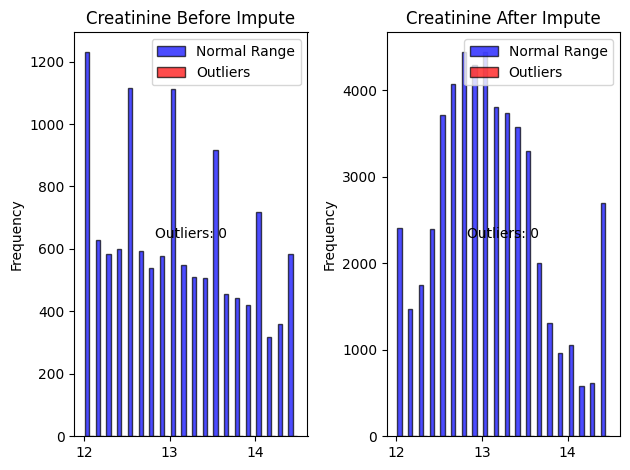

In [29]:
check_before_impute = data['L12:Hemoglobin']  # Change column name
reference_range = (12, 14.5)  # Define the reference range
outliersL3 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL3], check_before_impute[outliersL3]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL3.sum()
plt.title('Creatinine Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = data_mice_filled['L12:Hemoglobin']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Creatinine After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

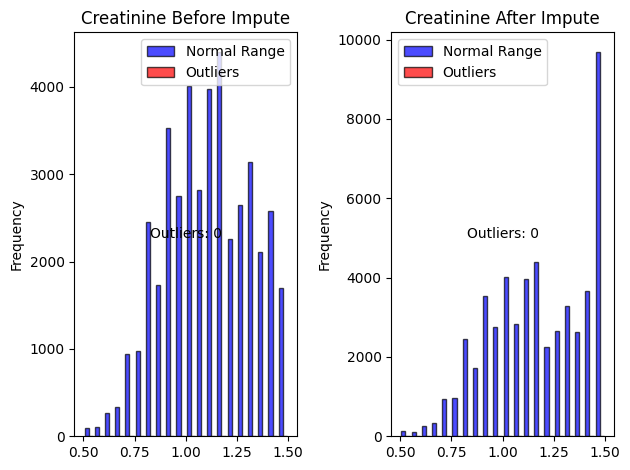

In [28]:
check_before_impute = data['L3:Creatinine']  # Change column name
reference_range = (0.50, 1.5)  # Define the reference range
outliersL3 = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~outliersL3], check_before_impute[outliersL3]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = outliersL3.sum()
plt.title('Creatinine Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = data_mice_filled['L3:Creatinine']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Creatinine After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

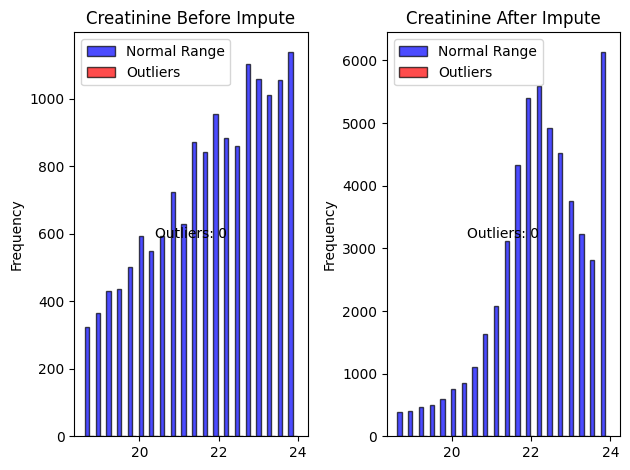

In [35]:
check_before_impute = data['BMI']  # Change column name
reference_range = (18.6, 24)  # Define the reference range
BMI = (check_before_impute < reference_range[0]) | (check_before_impute > reference_range[1])

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist([check_before_impute[~BMI], check_before_impute[BMI]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_before_impute = BMI.sum()
plt.title('Creatinine Before Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_before_impute}", ha='center', va='center', transform=plt.gca().transAxes)

check_after_impute = data_mice_filled['BMI']  # Change column name
outliers_after_impute = (check_after_impute < reference_range[0]) | (check_after_impute > reference_range[1])

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist([check_after_impute[~outliers_after_impute], check_after_impute[outliers_after_impute]], bins=20,
         color=['blue', 'red'], edgecolor='black', label=['Normal Range', 'Outliers'], alpha=0.7)
outlier_count_after_impute = outliers_after_impute.sum()
plt.title('Creatinine After Impute')
plt.ylabel('Frequency')
plt.legend()
plt.text(0.5, 0.5, f"Outliers: {outlier_count_after_impute}", ha='center', va='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

###convert year

In [30]:
df[['StartDTTM','EndDttm','time_t1','LabCwhen']]

,StartDTTM,EndDttm,time_t1,LabCwhen
0,2559-08-15 08:13:26.043,2559-08-16 05:01:01.473,2017-10-03 09:19:54.710,2559-08-15 09:51:55.203
1,2560-10-03 07:37:22.777,2560-10-04 05:01:01.903,2018-12-12 09:18:49.913,2560-10-03 09:19:54.920
2,2561-12-12 07:58:57.190,2561-12-13 05:01:01.250,2019-12-19 09:51:24.427,2561-12-12 10:15:36.930
3,2562-12-19 08:19:38.647,2562-12-20 05:01:01.910,2021-03-04 10:01:42.113,2562-12-19 09:51:24.577
4,2564-03-04 07:55:40.703,2564-03-05 05:01:01.240,2022-04-21 08:45:54.580,2564-03-04 10:07:37.037
...,...,...,...,...
52615,2565-03-14 14:31:31.910,2565-03-15 05:01:01.450,2023-04-04 08:28:58.833,2565-03-14 15:10:29.530
52616,2565-03-14 14:31:53.720,2565-03-15 05:01:01.450,2023-04-04 08:49:20.047,2565-03-14 15:45:26.500
52617,2565-03-05 12:36:33.263,2565-03-06 05:01:02.833,2023-04-10 08:36:15.217,2565-03-05 17:34:10.677
52618,2565-03-10 07:42:44.243,2565-03-11 05:01:01.390,2023-04-10 08:58:57.267,2565-03-10 11:13:28.003


In [31]:
import numpy as np
columns_to_keep  = df[['PatientUID', 'PatientVisitUID', 'Slopes','InPatient', 'OutPatient', 'Emergency','time_t1','eGFR_t1', 'VisitLocation', 'StartDTTM','EndDttm', 'LabCwhen']]
result = pd.concat([columns_to_keep, data_mice_filled], axis=1)
result.head()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,5.699413,225.645490,91.0,5.610058,215.0,81.0,123.0,99.0,8.153554,1.0
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,4.467940,245.031431,86.0,5.267543,219.0,64.0,146.0,73.0,7.766715,1.0
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,9.410000,313.000000,100.0,5.300000,193.0,62.0,129.0,65.0,9.425626,1.0
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,5.037146,245.783711,89.0,5.464536,205.0,69.0,139.0,76.0,8.110823,1.0
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,5.420000,251.507196,88.0,5.500000,198.0,74.0,129.0,60.0,8.373941,1.0


In [32]:
df1 = pd.DataFrame(result)

# Splitting the 'time' column into separate columns
df1[['date', 'timestamp']] = df1['LabCwhen'].str.split(' ', expand=True)
df1[['year', 'month', 'day']] = df1['date'].str.split('-', expand=True)
df1[['hour', 'minute', 'second']] = df1['timestamp'].str.split(':', expand=True)
df1[['second', 'nanosecond']] = df1['second'].str.split('.', expand=True)

# Convert year column from BE to AD
df1['year'] = df1['year'].astype(int) - 543

# Combine columns into a datetime column
df1['date'] = pd.to_datetime(df1[['year', 'month', 'day',]])
# Convert timestamp to Timedelta
df1['timestamp'] = pd.to_timedelta(df1['timestamp'])

# Convert date to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Merge timestamp and date columns
df1['LabCwhen'] = df1['date'] + df1['timestamp']

columns_to_drop = ['date', 'timestamp', 'year', 'month', 'day', 'hour', 'minute', 'second', 'nanosecond']
df1 = df1.drop(columns=columns_to_drop, axis=1)
df1

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L14:WBC,L15:Platelet,L19:Blood sugar,L20:HbA1c,L21:Cholesterol,L22:Triglyceride,L23:LDL Cholesterol,L24:HDL Cholesterol,L28:UrineProtein/Cr ratio,LabLocation
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2559-08-15 08:13:26.043,...,5.699413,225.645490,91.000000,5.610058,215.000000,81.000000,123.000000,99.000000,8.153554,1.0
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2560-10-03 07:37:22.777,...,4.467940,245.031431,86.000000,5.267543,219.000000,64.000000,146.000000,73.000000,7.766715,1.0
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2561-12-12 07:58:57.190,...,9.410000,313.000000,100.000000,5.300000,193.000000,62.000000,129.000000,65.000000,9.425626,1.0
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2562-12-19 08:19:38.647,...,5.037146,245.783711,89.000000,5.464536,205.000000,69.000000,139.000000,76.000000,8.110823,1.0
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2564-03-04 07:55:40.703,...,5.420000,251.507196,88.000000,5.500000,198.000000,74.000000,129.000000,60.000000,8.373941,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,3319961,9270330,-4.256753,0,1,0,2023-04-04 08:28:58.833,33.68,บูรณาการนอกเวลา (คลินิก)-OD191,2565-03-14 14:31:31.910,...,10.320000,306.000000,103.000000,5.900000,165.000000,148.398505,84.000000,43.000000,10.210041,1.0
52616,3319971,9270331,-0.692078,0,1,0,2023-04-04 08:49:20.047,26.47,บูรณาการนอกเวลา (คลินิก)-OD191,2565-03-14 14:31:53.720,...,9.560000,361.000000,99.000000,6.208089,154.000000,196.000000,83.000000,42.000000,10.920583,1.0
52617,3320048,9242721,7.217875,0,0,1,2023-04-10 08:36:15.217,70.36,OPD AE-DV191,2565-03-05 12:36:33.263,...,4.610000,231.671828,94.244344,5.417786,127.000000,96.000000,64.000000,43.920937,8.319455,1.0
52618,3320050,9257281,-32.794557,0,1,0,2023-04-10 08:58:57.267,30.69,หน่วยคลินิกเฉพาะทางศูนย์บริการทางการแพทย์ชั้นเลิศ,2565-03-10 07:42:44.243,...,9.440000,305.000000,99.137275,6.143738,196.579339,148.085846,108.298789,50.638626,9.485692,1.0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52620 entries, 0 to 52619
Data columns (total 82 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   PatientUID                    52620 non-null  int64         
 1   PatientVisitUID               52620 non-null  int64         
 2   Slopes                        52620 non-null  float64       
 3   InPatient                     52620 non-null  int64         
 4   OutPatient                    52620 non-null  int64         
 5   Emergency                     52620 non-null  int64         
 6   time_t1                       52620 non-null  object        
 7   eGFR_t1                       52620 non-null  float64       
 8   VisitLocation                 52620 non-null  object        
 9   StartDTTM                     52620 non-null  object        
 10  EndDttm                       52620 non-null  object        
 11  LabCwhen                    

In [33]:
df1.to_excel('outlier_mice.xlsx')